Introduction
--------------

Filtering means preserving certain favored signal frequencies while simultaneously suppressing others. At first, this may seem as easy as simply removing  all the offending frequencies of interest in the Fourier transform and keeping the rest, but practical considerations prohibit this. 

There are many approaches to filtering and the following shows an example of a finite impulse response (FIR) filter. 

As discussed before FIR filters have no feedback loops, which means that they only depend on the input. They are usually easy-to-understand and allow for flexible design specifications. 

### Finite Impulse Response Filters as Moving Averages

Finite Impulse Response (FIR) filters have the following form: 

$$ y_n = \sum_{k=0}^{M-1} h_k x_{n-k} $$

the input is $ x_n $ and the output $ y_n $. As we can see the output only depends on the input from some time before the sampling (i.e. $n-k$). This is a finite impulse response because they stop after running out of input. Some time they are named  *moving average* filters or *all-zero* filters. $ M $  determines the number of coefficients that the filter has, which means that the output depents on the input with two coefficients applied to it.

Given an FIR filter with 2 coefficients, $ h_0 = h_1 = 1/2 $, the output will be obtained by doing the operation

$$ y_n = x_{n}/2 + x_{n-1}/2 $$

So if we have an input $ x_n=1 \hspace{.5em} \forall n \ge 0 $,  the output will be then $ y_n = 1 \hspace{.5em} \forall n \ge 1  $. 

Note that we lose one sample in filling the filter for $ n=0 $ which means we have to wait one sample for a valid filter output. This wait time is called a *transient* state.

For an input 
 $ x_n= \exp \left( j\pi n \right)  \hspace{.5em} \forall n\ge 0 $, then $ y_n=0 \forall n \ge 1  $. 
 
These kind of filters eliminate the highest frequency signal ($ \omega=\pi $) and preserve the lowest frequency signal ($ \omega=0 $).

We can actually analyze this filter using the tools in the `scipy.signal` module.


Axes(0.125,0.125;0.775x0.302)


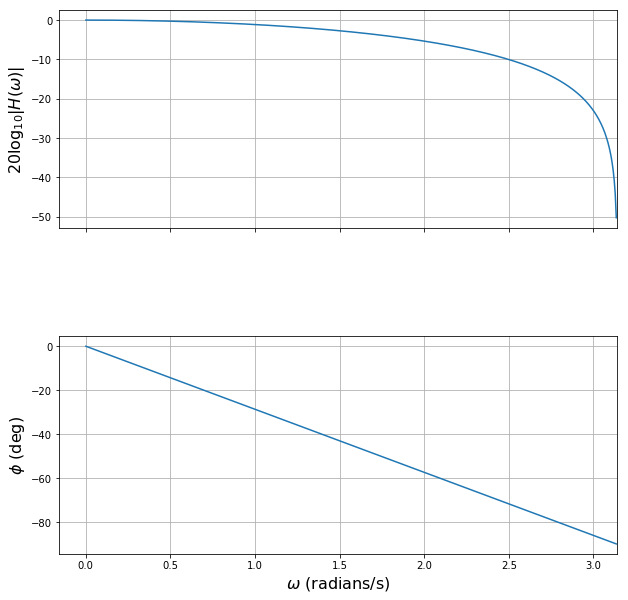

In [7]:
# MATPLOTLIB imports matlab plotting library and inline allows the plot to be plotted within the notebook
%matplotlib inline

# Future serves three purposes, to  avoid confusing existing tools, 
# ensures that future statements run under a releases prior to 2.1
# executable documentation
# and allows division
from __future__ import division

# Imports a signal processing toolbox. Contains different types of filters and filter design tools. 
from scipy import signal 

# Imports the fundmental package for scientific computing and short form as np
import numpy as np

# Imports matlab plotting library and uses a short form as plt (assignment opertor)
import matplotlib.pyplot as plt

#this here only adjust the aspect of the plots

# 2 rows, 1 column, share the x-axis
fig, axs = plt.subplots(2,1,sharex=True)

# Adjust the height reserved for white space between subplots
plt.subplots_adjust( hspace = 0.5 )

# Sets the size of the plots
fig.set_size_inches((10,10))



ax=axs[0]


w,h=signal.freqz([1/2., 1/2.],1) #we compute impulse response for the filter above (coefficients)
ax.plot(w,20*np.log10(abs(h))) #we plot the logarithmic response as a function of the frequency in radians
ax.set_ylabel(r"$20 \log_{10} |H(\omega)| $",fontsize=16)
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180) #we compute the phase of the response in degrees
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=16)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.grid()

The top plot shows the amplitude response of the filter (in dB) and the bottom plot shows the phase response in degrees. At $\omega=0 $, we have $|H(\omega=0)|=1 $ (i.e unity-gain) which says that our moving average filter will not alter the amplitude of the signals at $ \omega=0 $. 

When we reach $\omega= \pi $, we have a small attenuation and for higher frequencies we will filter. Thus, signals at high frequencies are attenuated or we have a low pass filter.

The following example will use 8 moving average filter-length.

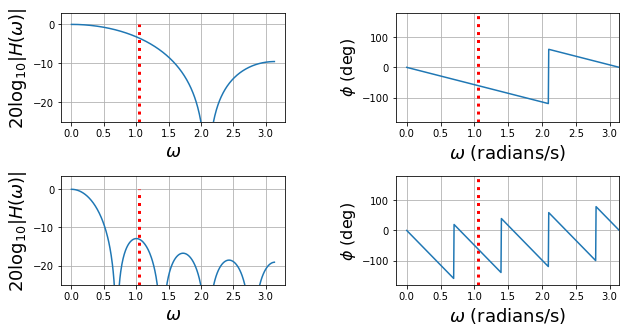

In [5]:
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

ax = fig.add_subplot(plt.subplot(gs[0,0]))

ma_length = 3 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ma_length = 9 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
ax = fig.add_subplot(plt.subplot(gs[1,0]))
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

Let's see the input and output for this last filter. We have an input $cos$ signal with a $\pi/3$rad frequency and we apply the filter

[ 1.   0.5 -0.5 -1.  -0.5  0.5  1.   0.5 -0.5 -1.  -0.5  0.5  1.   0.5 -0.5
 -1.  -0.5  0.5  1.   0.5 -0.5 -1.  -0.5  0.5  1.   0.5 -0.5 -1.  -0.5  0.5]


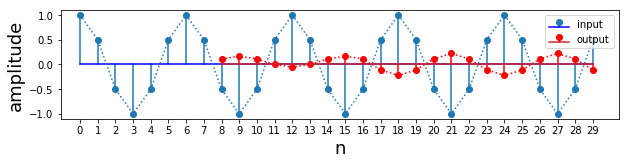

In [8]:
fig=plt.figure()
fig.set_size_inches((10,5))

ax = fig.add_subplot(plt.subplot(gs[1,:]))

#n is an array from 0 to 29
Ns=30
n= np.arange(Ns)

x = np.cos(np.arange(Ns)*np.pi/3.)  #building the signal with a frequency of 2pi/6
print(x)
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)  #applying the filter that uses 8 coefficients that are equal to 1

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);

The figure shows the magnitude was indeed affected since at that frequency we do have an attenuation (see the vertical line made at $\pi/2$ rad. The phase is also affected because of the moving average and the output is delayed by the length of the input filter. 

Because the frequency of the input signal is $ 2\pi/6 $, and its period is $T=6$ samples, the input signal repeats every six samples. 

The phase at this discrete frequency is approximately 30 degrees plus and the output sequence is shifted over by half a sample ($ 30/360 = 0.5/6 $) plus the 3 samples (half the six sample period, $ 180/360=1/2 $). 

## Summary

In this example we show a simple FIR filter by defining FIR filter coefficients. We defined a filter and then investigated its effects on the signal and its frequency response.

However, in a real situation, we should define a desired filter specification and obtain the right coefficients that allow us to obtain the desired behaviour. 

Test your knowledge:
* Modify the code above to see the frequency response of a filter that averages 3 inputs (this example has averaged 3 first, then 9) and describe the behaviour of this new filter
* You will be asked to discuss the applicability of this filter for an $\omega=1$

Comments and corrections welcome!

References
---------------

* Proakis, John G. ,*Digital signal processing: principles algorithms and applications*. Pearson Education India, 2001.